In [622]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline


from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

H = 1000
p = 6589
M = 1.05319
m0 = 19.71*10**(-6)
m = 8.81*10**(-6)
S = 3.0/2.0

mu_0 = 4*np.pi*10**(-7)
k_B = 1.38064852*10**(-23)
mu_B = 9.274009994*10**(-24)
n = 3.0/(288.61*10**(-30))
r = 4.18*10**(-10) #Nd-Nd distance
g = 1.4 #why this g-factor?????
N_A = 6.02214085*10**(23)


x0 = 4*np.pi*10**(-6)*(M/(m*H)) #SI molar susceptibility

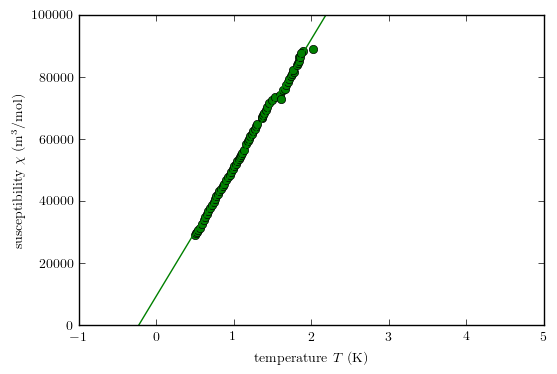

0.227499671048 0.0102428521981


In [623]:
Ti = np.genfromtxt('Nd3TiGa5O14_MvsT_0p5to3K_1kG.dat',delimiter=',',skip_header=9)
ti = np.genfromtxt('NdTi_powder.dat',delimiter=',',skip_header=32)
Ge = np.genfromtxt('Nd3GeGa5O14_ChiVsT_100_Oe.dat',delimiter=',',skip_header=32)

temp = Ti[:,2]
susc = x0*Ti[:,3]
error = x0*Ti[:,4]
reg = Ti[:,5]

t = ti[:,3]
s = x0*m*ti[:,4]/m0
i = 1/s
E = x0*m*ti[:,5]/m0

def fit(x,A,B):
    return A*x+B
p0 = [1,1]
popt, pcov = curve_fit(fit, temp, 1/susc, p0)
perr = np.sqrt(np.diag(pcov))
A,B=popt
x = np.linspace(-1, 5., 200)

plt.plot(temp, 1/susc, 'go')
plt.plot(x, A*x+B, 'g')
plt.xlabel("temperature $T$ (K)")
plt.ylabel("susceptibility $\\chi$ (m$^3$/mol)")
plt.rcParams["figure.figsize"] = [4,3]
#plt.legend(bbox_to_anchor=(0.5, 0.94), loc=2, borderaxespad=0.)
axes = plt.gca()
#axes.set_xlim([1,2.2])
axes.set_ylim([0,100000])
plt.show()
plt.close()

a,b=perr
ERR_TC = (B/A)*np.sqrt((a/A)**2+(b/B)**2) 
print(B/A,ERR)

In [624]:
T_c=-B/A
mu_eff = np.sqrt(3*k_B/(A*N_A*mu_0*mu_B**2)) #easier calculation
#mu_eff = np.sqrt(3*k_B*p/(A*M*n*mu_0*mu_B**2)) #initial calculation
J_exch = 3*np.abs(T_c)/(2*S*(S+1))
D = mu_0*g**2*mu_B**2/(k_B*r**3)

print(mu_eff)
print(0.5*np.sqrt(3*k_B/(N_A*mu_0*mu_B**2))*(a/A**(3./2)))

3.91940162521
0.015432323096


In [625]:
Ti[:,3]=x0*Ti[:,3]
Ti[:,4] = x0*Ti[:,4]
np.savetxt('Output/Nd3TiGa5O14_low.txt', Ti, delimiter=',')

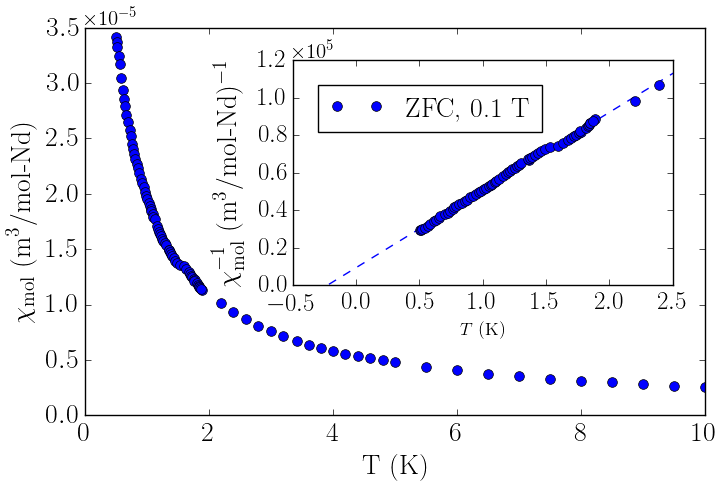

In [632]:
R = 0.975
fig, ax1 = plt.subplots()
#plt.gcf().subplots_adjust(bottom=0.10)
#plt.gcf().subplots_adjust(left=0.15)
#plt.rcParams.update({'font.size': 16})
# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.385, 0.385, 0.475, 0.45]
ax2 = fig.add_axes([left, bottom, width, height])
plt.rcParams["figure.figsize"] = [8,5]

#main graph
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.yaxis.get_offset_text().set_fontsize(15)
ax1.tick_params(axis='both', which='major', labelsize=20)
#ax1.plot(temp, susc, 'bo',label="Nd-Ti")
ax1.errorbar(temp[reg>R], susc[reg>R], yerr=error[reg>R], markersize=7, fmt='bo',markeredgewidth=0.5)
ax1.errorbar(t, s, yerr=E, markersize=7, fmt='bo')
ax1.set_xlim([0,10])
ax1.set_xlabel("T (K)", fontsize=20)
ax1.set_ylabel("$\\chi_\mathrm{mol}$ (m$^3$/mol-Nd)", fontsize=20)

#inset
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax2.yaxis.get_offset_text().set_fontsize(15)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.plot(x, A*x+B, 'blue', linestyle='dashed', linewidth=1)
ax2.plot(temp[reg>R], 1/susc[reg>R], 'bo', markersize=7, label="ZFC, 0.1 T") #'bo', markersize=3
ax2.plot(t, i, 'bo', markersize=7) #'bo', markersize=3
ax2.legend(bbox_to_anchor=(0.065, 0.89), fontsize=20, loc=2, borderaxespad=0.)
ax2.set_xlabel("$T$ (K)", fontsize=13)
ax2.set_ylabel("$\\chi^{-1}_{\mathrm{mol}}$ (m$^3$/mol-Nd)$^{-1}$", fontsize=20)
ax2.set_xlim([-0.5,2.5])
ax2.set_ylim([0,0.12e6])

plt.savefig('NTGO_suscept_powder.eps')
plt.show()

In [ ]:
fig, ax1 = plt.subplots()
plt.gcf().subplots_adjust(bottom=0.10)
plt.gcf().subplots_adjust(left=0.15)
#plt.rcParams.update({'font.size': 16})

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.385, 0.45, 0.475, 0.41]
ax2 = fig.add_axes([left, bottom, width, height])
plt.rcParams["figure.figsize"] = [12,9]

ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.yaxis.get_offset_text().set_fontsize(24)
ax1.tick_params(axis='both', which='major', labelsize=25)
#ax1.plot(temp, susc, 'bo',label="Nd-Ti")
ax1.errorbar(temp, susc, yerr=error, markersize=9, fmt='bo',markeredgewidth=0.0)
ax1.errorbar(t, s, yerr=E, markersize=9, fmt='bo')
ax1.set_xlim([0,10])
ax1.set_xlabel("temperature (K)", fontsize=33)
ax1.set_ylabel("$\\chi_\mathrm{mol}$ (m$^3$/mol-Nd)", fontsize=33)

ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax2.yaxis.get_offset_text().set_fontsize(22)
ax2.tick_params(axis='both', which='major', labelsize=23)
ax2.plot(t, i, linewidth=3, label="NTGO, ZFC, 0.1 T") #'bo', markersize=3
#ax2.plot(x, A*x+B, 'black', linestyle='dashed', linewidth=2)
ax2.legend(bbox_to_anchor=(0.075, 0.9), fontsize=20, loc=2, borderaxespad=0.)
ax2.set_xlabel("temperature (K)", fontsize=28)
ax2.set_ylabel("$1/\\chi_{\mathrm{mol}}$ (mol-Nd/m$^3$)", fontsize=28)
ax2.set_xlim([-50,300])
#ax2.set_ylim([0,2e7])
plt.savefig('NTGO_suscept_powder.eps')
plt.show()